In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

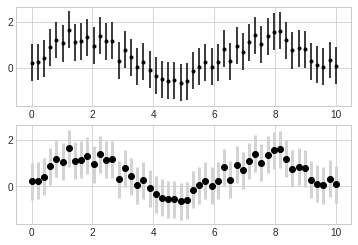

In [11]:
#基本誤差圖
x=np.linspace(0,10,50)
dy=0.8
y=np.sin(x)+dy*np.random.rand(50)
#利用errorbar
plt.subplot(2,1,1)
plt.errorbar(x,y,yerr=dy,fmt='.k');
#額外選項達到客製化
plt.subplot(2,1,2)
plt.errorbar(x,y,yerr=dy,fmt='o',color='black',
       ecolor='lightgray',elinewidth=3,capsize=0);

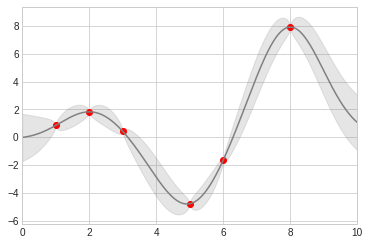

In [23]:
#連續型誤差(plot+fill_between)
from sklearn.gaussian_process import GaussianProcessRegressor
#定義modle並畫出一些資料
model=lambda x:x*np.sin(x)
xdata=np.array([1,2,3,5,6,8])
ydata=model(xdata)
#計算Gaussian process fit
gp=GaussianProcessRegressor()
gp.fit(xdata[:,np.newaxis],ydata)

xfit=np.linspace(0,10,1000)
yfit,MSE=gp.predict(xfit[:,np.newaxis],return_std=True)
dyfit=2*np.sqrt(MSE)#信賴區間
#視覺化結果
plt.plot(xdata,ydata,'or')
plt.plot(xfit,yfit,'-',color='gray')
plt.fill_between(xfit,yfit-dyfit,yfit+dyfit,
         color='gray',alpha=0.2)
plt.xlim(0,10);